#### SVM Implementation using Pegasos

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

In [9]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

In [10]:
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

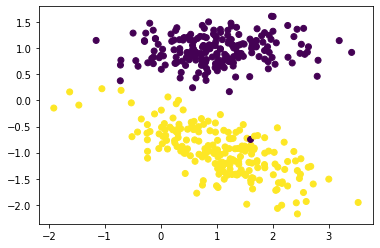

In [11]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [12]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        W = np.zeros((1,no_of_features))
        bias = 0
        losses = []
        
        for i in range(maxItr):
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                gradw = 0
                gradb = 0
                
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses


In [16]:
mySVM = SVM()
W,b,losses = mySVM.fit(X,Y,maxItr=100)

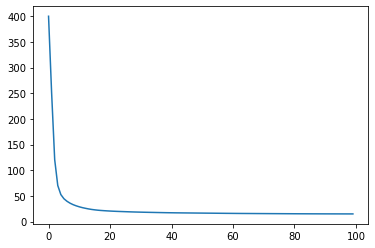

In [17]:
plt.plot(losses)
plt.show()

In [18]:
print(losses[0])
print(losses[-1])

400.0
14.967338657285


In [19]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[-0.32214504 -2.03308166]] 0.38700000000000023


In [20]:
def plotHyperplane(w1,w2,b):

    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 
    
    x_p = -(w1*x_1+b+1)/w2 
    x_n = -(w1*x_1+b-1)/w2 
    
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="Positive Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="Negative Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

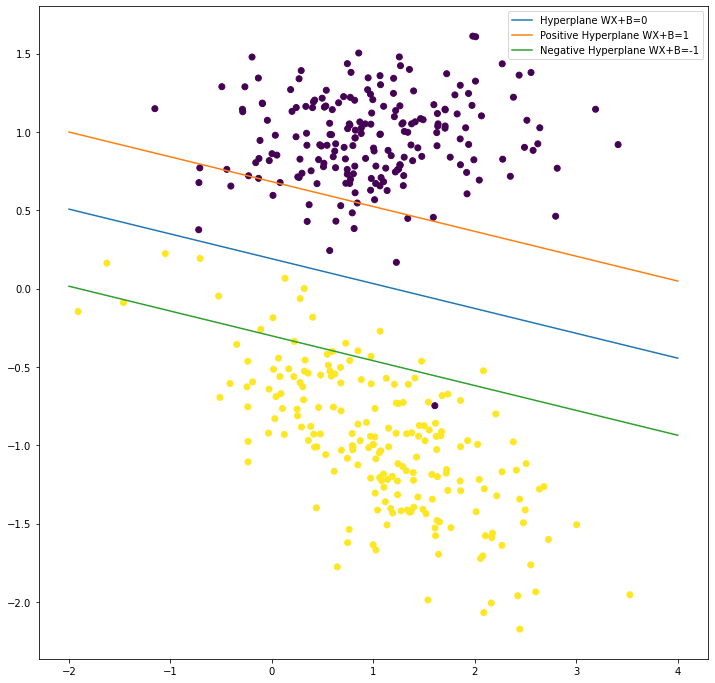

In [21]:
plotHyperplane(W[0,0],W[0,1],B)

In [24]:
mySVM = SVM(C=10)
W,b,losses = mySVM.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])
W,B = mySVM.W,mySVM.b
print(W,B)

4000.0
75.31933122086052
[[-0.75851031 -3.32564427]] 0.8600000000000003


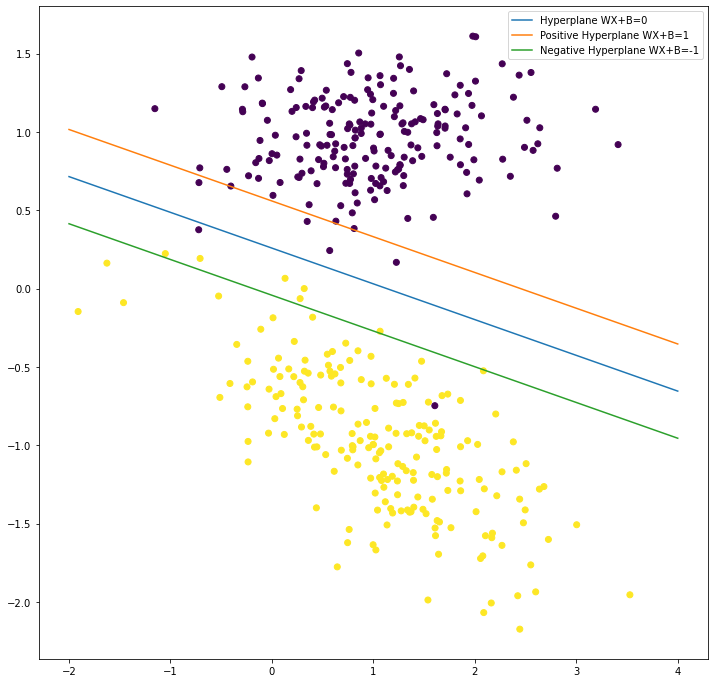

In [25]:
plotHyperplane(W[0,0],W[0,1],B)

In [43]:
mySVM = SVM(C=50)
W,b,losses = mySVM.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])
W,B = mySVM.W,mySVM.b
print(W,B)

20000.0
303.6099203781077
[[-1.1991989  -4.30960227]] 0.9999999999999996


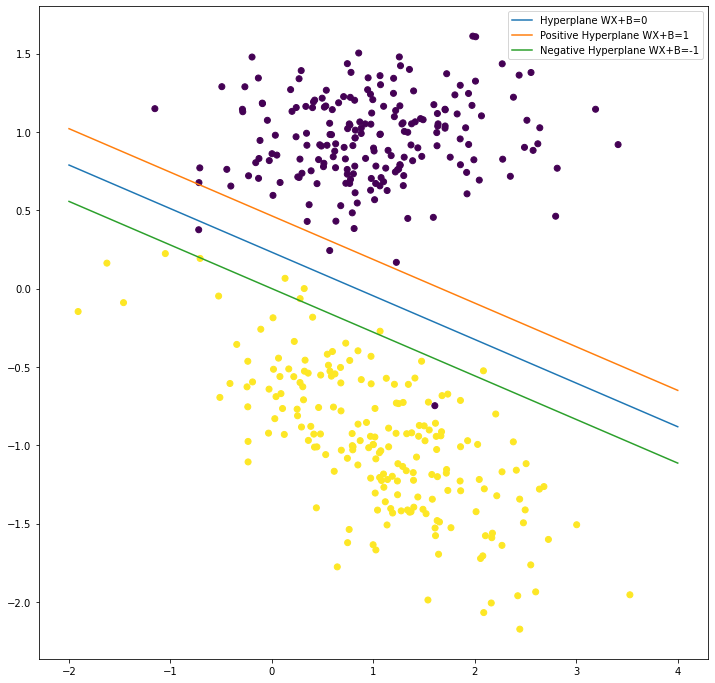

In [44]:
plotHyperplane(W[0,0],W[0,1],B)